# Testing Model with Validation Dataset

In [26]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import gzip, pickle
import seaborn as sns

##### Testing the models - Random Forests and Decision Tree - using the validation data.

In [27]:
validation_df = pd.read_csv('../data/validation_modelling.csv')
validation_df.set_index('name', inplace=True)
validation_df.head()

,region,country,vintage,producer,wine_variety,grape_variety,price,rating,rating_qty,abv,from_vivino,age,log_price,log_rating_qty,age^2,rating * log_rating_qty
name,,,,,,,,,,,,,,,,
Rapido Sangiovese 2019,179.0,10.0,32.0,5672.0,0.0,105.0,7.35,3.5,41.0,13.266555,1.0,5.0,1.994700,3.713572,25.0,12.997502
Domenico Clerico Arte Rosso 2012,113.0,10.0,25.0,2958.0,1.0,124.0,29.36,3.9,72.0,13.361634,1.0,12.0,3.379633,4.276666,144.0,16.678998
Caliterra Edicion Limitada A 2015,65.0,4.0,28.0,954.0,0.0,124.0,17.34,3.9,95.0,13.406684,1.0,9.0,2.853016,4.553877,81.0,17.760120
Coto De Gomariz Maria Alvarez Serrano Abadia De Gomariz 2015,163.0,19.0,28.0,2457.0,0.0,124.0,14.44,3.8,35.0,13.701542,1.0,9.0,2.670002,3.555348,81.0,13.510323
Frederic Magnien Pinot Noir Bourgogne 2009,34.0,5.0,22.0,3447.0,0.0,78.0,28.95,3.7,39.0,13.615724,1.0,15.0,3.365570,3.663562,225.0,13.555178


### Decison Tree Model

In [28]:
# Import price predictive model from 04 - decision tree model
filepath = '../models/casi_dt_production.pkl'
with gzip.open(filepath, 'rb') as f:
    p = pickle.Unpickler(f)
    model = p.load()

In [29]:
# Test model on validation dataset 
X = validation_df.drop(columns = ['log_price', 'price', 'age', 'age^2', 'abv', 'from_vivino'])
y = validation_df['log_price']
log_price_pred  = model.predict(X)

mse = mean_squared_error(y, log_price_pred)

print(f"Price USD Root Mean Squared Error (RMSE): {round(np.exp(np.sqrt(mse)),3)}")
print(f"R-squared score: {round(r2_score(y, log_price_pred),3)}")

Price USD Root Mean Squared Error (RMSE): 1.364
R-squared score: 0.862


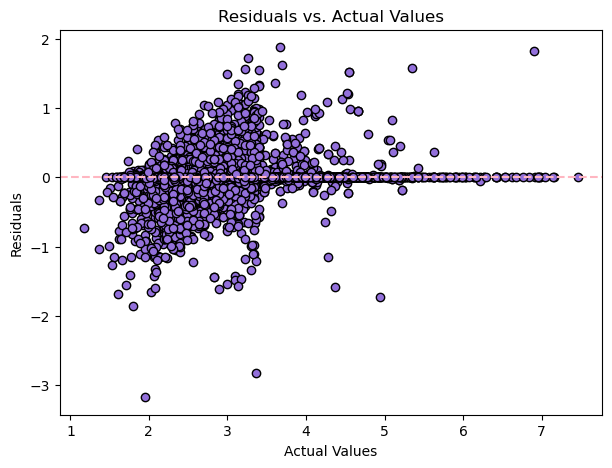

In [30]:
# Plot residuals to check for systematic errors 
residuals = y - log_price_pred
plt.figure(figsize=(7, 5))
plt.scatter(y, residuals, color='mediumpurple', edgecolor='k')
plt.axhline(y=0, color='lightpink', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Values');

### Random Forest Model

In [31]:
# Import price predictive model from 04 - decision tree model
filepath = '../models/casi_rf_production.pkl'
with gzip.open(filepath, 'rb') as f:
    p = pickle.Unpickler(f)
    model_rf = p.load()

In [32]:
# Test model on validation dataset 
log_price_pred_rf  = model_rf.predict(X)
mse_rf = mean_squared_error(y, log_price_pred_rf)

print(f"Price USD Root Mean Squared Error (RMSE): {round(np.exp(np.sqrt(mse_rf)),3)}")
print(f"R-squared score: {round(r2_score(y, log_price_pred_rf),3)}")

Price USD Root Mean Squared Error (RMSE): 1.259
R-squared score: 0.924


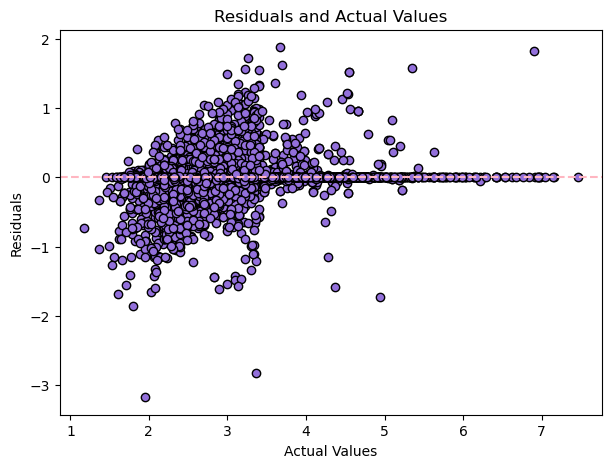

In [33]:
# Plot residuals to check for systematic errors 
residuals_rf = y - log_price_pred_rf
plt.figure(figsize=(7, 5))
plt.scatter(y, residuals, color='mediumpurple', edgecolor='k')
plt.axhline(y=0, color='lightpink', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals and Actual Values');

In [36]:
residuals_rf.shape
print(X.shape)

(4815, 10)


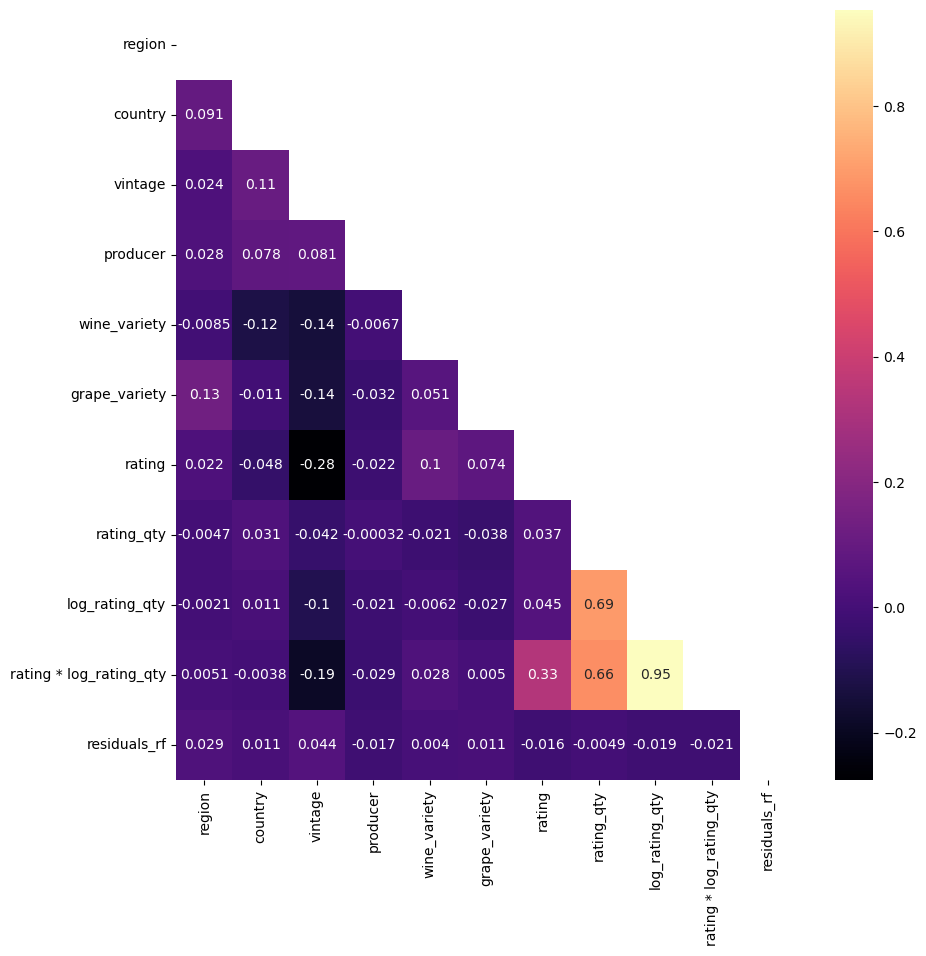

In [38]:
to_plot = X.copy()
to_plot['residuals_rf'] = residuals_rf
plt.figure(figsize=(10, 10))
mask = np.zeros_like(to_plot.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(to_plot.corr(), mask = mask, annot=True, cmap='magma');

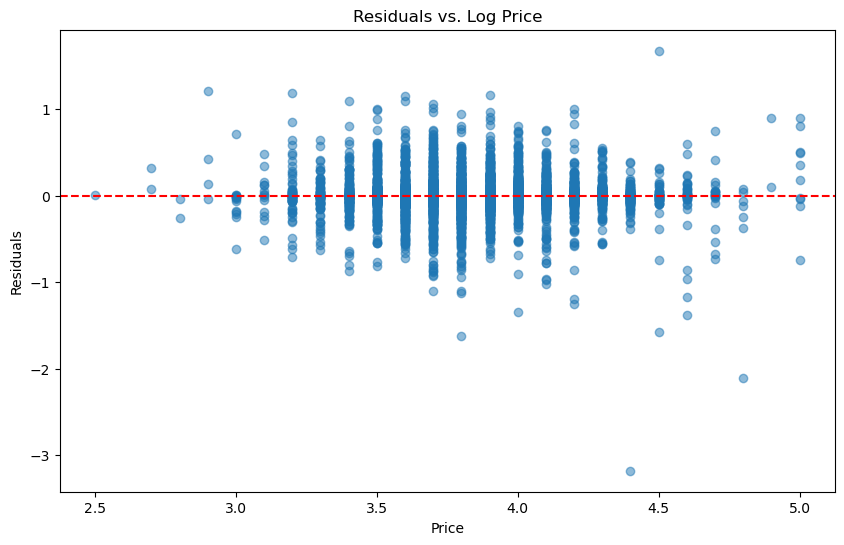

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(validation_df['rating'], residuals_rf, alpha=0.5)
plt.title('Residuals vs. Log Price')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--');

In [ ]:
# Isolating high residuals over 1.5
abs_residuals = np.abs(residuals_rf)

# Filter residuals greater than 1.5
residuals_gt_1_5 = abs_residuals > 1.5

# Isolate rows in your validation dataframe with residuals greater than 1.5
validation_df_large_residuals = validation_df[residuals_gt_1_5]

#### Preparing validation dataframe for use in application.

In [9]:
app_frontend = pd.read_csv('../data/validation_frontend.csv', index_col=0)

In [10]:
def to_normal_case(column_name):
    return ' '.join(word.capitalize() for word in column_name.split('_'))
app_frontend.columns = [to_normal_case(column) for column in app_frontend.columns]
app_frontend.rename(columns = {'Abv': 'ABV', 'Rating': 'Average Rating', 'Price' : 'Price ($)'}, inplace=True)

In [11]:
app_frontend.drop(columns = ['Reviewed By', 'From Vivino', 'Rating Qty', 'Log Rating Qty'], inplace=True)

In [12]:
# Reordering the last two columns
cols = app_frontend.columns.tolist()  # Get the list of all columns
cols[-2], cols[-1] = cols[-1], cols[-2]  # Swap the last two column names
app_frontend = app_frontend[cols]

In [13]:
app_frontend['Wine Variety'] = app_frontend['Wine Variety'].apply(to_normal_case)
app_frontend['Average Rating'] = app_frontend['Average Rating'].apply(lambda x: round(float(x),2))

In [14]:
print(validation_df.shape)
print(app_frontend.shape)

(4815, 16)
(4815, 11)


In [15]:
validation_df.drop(columns = ['price', 'age', 'age^2', 'abv', 'from_vivino']).to_csv('../app/app_backend.csv', index=False)
app_frontend.to_csv('../app/app_frontend.csv', index=True)